In [1]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(
        32, (3, 3), activation="relu",
        input_shape=(150, 150, 3)
    ),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = "C:\\My projects\\DS\\13_Mod\\train"
validation_dir = "C:\\My projects\\DS\\13_Mod\\validation"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.5105 - loss: 0.7678 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
  2/100 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5875 - loss: 0.6947

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5271 - loss: 0.6953 - val_accuracy: 0.5330 - val_loss: 0.6862
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.5664 - loss: 0.6881 - val_accuracy: 0.6130 - val_loss: 0.6576
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.6428 - loss: 0.6466 - val_accuracy: 0.6750 - val_loss: 0.6180
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.6835 - loss: 0.6048 - val_accuracy: 0.6770 - val_loss: 0.5967
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7174 - loss: 0.5669 - val_accuracy: 0.7020 - 

In [ ]:
# # ValueError: x and y must have same first dimension, but have shapes (30,) and (15,)

# import matplotlib.pyplot as plt


# acc = history.history["accuracy"]
# val_acc = history.history["val_accuracy"]

# loss = history.history["loss"]
# val_loss = history.history["val_loss"]

# epochs = range(1, len(acc) + 1)
 
# plt.plot(epochs, acc, "bo", label="Training acc")
# plt.plot(epochs, val_acc, "b", label="Validation acc")

# plt.title("Training and validation accuracy")
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss")
# plt.title("Training and validation loss")

# plt.legend()
# plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# rotation_range - величина в градусах (0-180), діапазон, в якому здійснюватиметься випадковий поворот зображення;
# width_shift та height_shift - діапазони в частках ширини та висоти, в межах яких зображення зміщуються по горизонталі та вертикалі відповідно;
# shear_range - для випадкового застосування зсувного перетворення (shearing);
# zoom_range - для випадкової зміни масштабу всередині зображень;
# horizontal_flip - для випадкового перевертання половини зображення по горизонталі;
# fill_mode - стратегія заповнення новостворених пікселів, що з'являються після повороту або усунення по горизонталі. чи вертикалі.


In [ ]:
# ! pip install more-itertools
import more_itertools
from more_itertools import take

take(3, range(100))


[0, 1, 2]

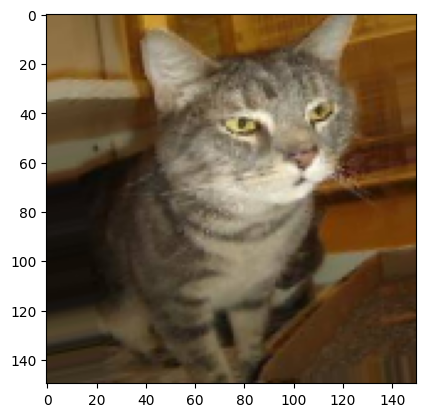

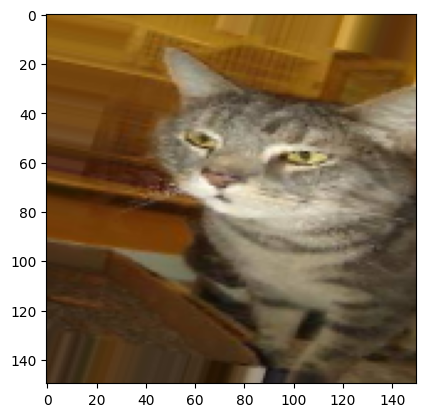

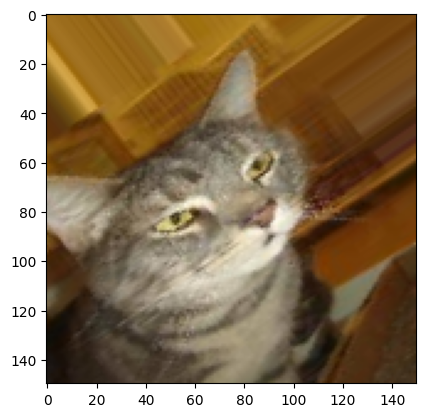

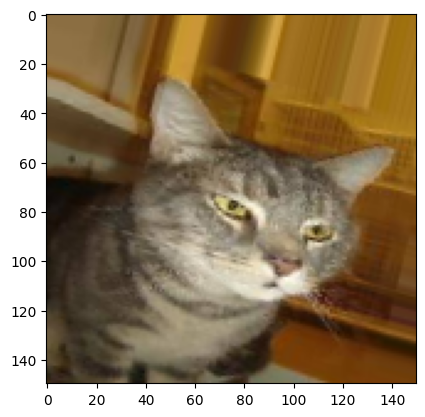

In [28]:
import os

import matplotlib.pyplot as plt

from more_itertools import take
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_cats_dir = "train/cats"

fnames = [
    os.path.join(train_cats_dir, fname)
    for fname in os.listdir(train_cats_dir)
]

img_path = fnames[92]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

for batch in take(4, datagen.flow(x, batch_size=1)):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))

plt.show()


In [29]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["acc"]
)


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ~ 8 minutes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - acc: 0.4615 - loss: 0.7205 - val_acc: 0.5000 - val_loss: 0.6923
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - acc: 0.6000 - loss: 0.6902

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - acc: 0.4986 - loss: 0.6948 - val_acc: 0.5800 - val_loss: 0.6916
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - acc: 0.5343 - loss: 0.6929 - val_acc: 0.6520 - val_loss: 0.6717
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - acc: 0.5768 - loss: 0.6775 - val_acc: 0.5080 - val_loss: 0.7861
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - acc: 0.6104 - loss: 0.6489 - val_acc: 0.6870 - val_loss: 0.6198
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - acc: 0.6418 - loss: 0.6299 - val_acc: 0.6430 - val_loss: 0.6266
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━

In [34]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [35]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False

model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 43 minutes
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/100


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 500ms/step - acc: 0.6254 - loss: 0.6567 - val_acc: 0.8370 - val_loss: 0.4501
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 519ms/step - acc: 0.7852 - loss: 0.4914 - val_acc: 0.8610 - val_loss: 0.3670
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 526ms/step - acc: 0.8033 - loss: 0.4355 - val_acc: 0.8760 - val_loss: 0.3235
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 525ms/step - acc: 0.8179 - loss: 0.4071 - val_acc: 0.8860 - val_loss: 0.3004
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 522ms/step - acc: 0.8473 - loss: 0.3759 - val_acc: 0.8780 - val_loss: 0.2970
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 529ms/step - acc: 0.8440 - loss: 0.3644 - val_acc: 0.8910 - val_loss: 0.2789
Epoch 12/100
100/100 ━━━━━━━━━━━━━

ValueError: x and y must have same first dimension, but have shapes (100,) and (50,)

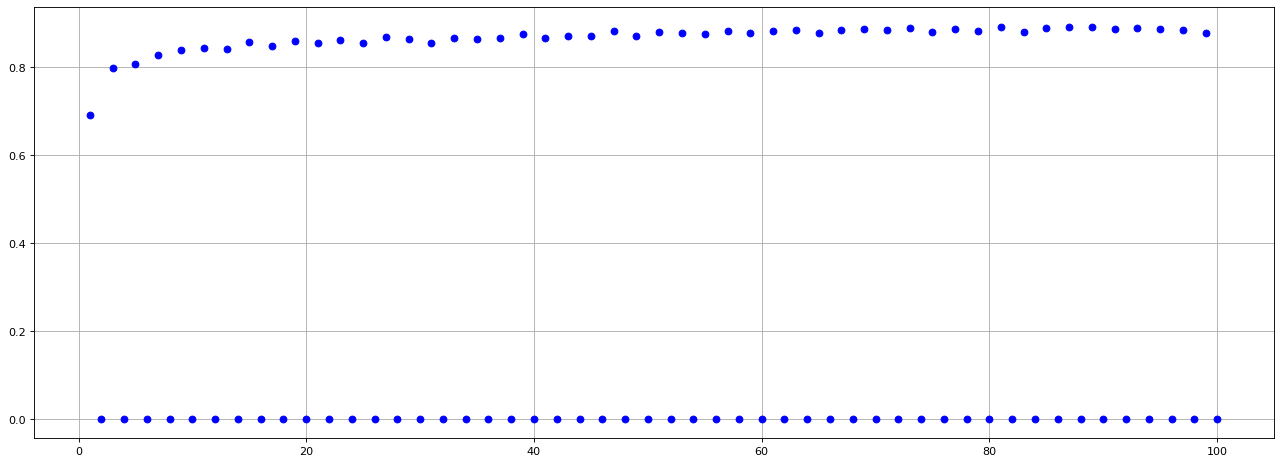

In [39]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()


In [40]:
model.save("C:\\My projects\\Models\\vgg16_based_model.keras")

In [41]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
## Для того щоб розморозити кілька верхніх шарів у створеному раніше conv_base
# conv_base.trainable = True
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False


In [42]:
# Донавчання на останніх 3-х шарах 

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])


In [43]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["acc"]
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 515ms/step - acc: 0.8846 - loss: 0.2790 - val_acc: 0.9060 - val_loss: 0.2401
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 519ms/step - acc: 0.8754 - loss: 0.2797 - val_acc: 0.9030 - val_loss: 0.2396
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 516ms/step - acc: 0.8954 - loss: 0.2567 - val_acc: 0.9050 - val_loss: 0.2431
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 516ms/step - acc: 0.8822 - loss: 0.2616 - val_acc: 0.9050 - val_loss: 0.2389
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 510ms/step - acc: 0.8931 - loss: 0.2641 - val_acc: 0.9040 - val_loss: 0.2423
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 516ms/step - acc: 0.9000 - loss: 0.2502 - val_acc: 0.9050 - val_loss: 0.2397
Epoch 12/100
100/100 ━━━━━━━━━━━━━

In [50]:
# Get the last accuracy score
last_accuracy = history.history['acc'][-2]
last_validation_accuracy = history.history['val_acc'][-2]

print(f"Last training accuracy: {last_accuracy:.4f}")
print(f"Last validation accuracy: {last_validation_accuracy:.4f}")

Last training accuracy: 0.8975
Last validation accuracy: 0.9050
